## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Sentiment analysis</span></b> </div>

Sentiment analysis is the process of analyzing text data to determine the sentiment expressed within it with the goal of establishing the attitude, opinion, or emotion conveyed by the customers/cients, which can be positive, negative, or neutral. This helps a lot in identifying the weak areas which need to be addressed or which are the strong points or products being talked about by the consumers and how they can also be improved. 

#### Purpose
The purpose of this sentiment analysis is to extract insights from textual data to understand how consumers feel about certain EABL products, brands, projects or events. By analyzing sentiment, businesses can:

* Gauge customer satisfaction and sentiment towards their products or services.
* Monitor brand reputation and sentiment on social media platforms.
* Identify emerging trends and consumer preferences.
* Inform decision-making processes, such as product development, marketing strategies, and customer support initiatives.

For `EABL`, we sought to look for customer sentiments on their products and projects within `E.Africa`namely:
* `Tusker, Guiness, Smirnoff, Waragi, Serengetti` and `Gilbeys`.
* The projects are `the EABL foundation`, `Tusker Oktoberfest` and `Tusker Project Fame` which aired between `2011-2013`.

#### Objectives
1. Analyze the tweet distribution per days, weeks, months and years.
2. Identify the most common product from the sentiments.


In [ ]:
# Data manipulation libraries
import pandas as pd 
import numpy as np

# Load the final_merge.csv file into a Pandas DataFrame.
df = pd.read_csv("merged_sentiments.csv")
df.head()

In [4]:
# Checking for missing values
import re
print(df.isnull().sum())

# Handle missing values in 'text' column
df['text'].fillna('', inplace=True)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], utc=True)

# Text Cleaning
def data_cleaning(data):
    data = data.lower()
    # Remove mentions
    data = re.sub(r'@[A-Za-z0-9_]+', '', data)
    # Remove URLs
    data = re.sub(r'http\S+', '', data)
    # Remove non-alphabetic characters
    data = re.sub(r'[^a-zA-Z\s]', '', data)
    # Remove leading/trailing whitespaces
    data = data.strip()
    return data 

df['text'] = df['text'].apply(data_cleaning)

# Engineer new features from 'date' column
df['day_of_week'] = df['date'].dt.day_name()  
df['month'] = df['date'].dt.month 
df['year'] = df['date'].dt.year  

# Feature Engineering new column for text length
df['text_length'] = df['text'].apply(len)  

# Handling Likes and Tweets
df['No_of_likes'] = df['No_of_likes'].astype(int)
df['No_of_tweets'] = df['No_of_tweets'].astype(int)

# Drop unnecessary columns
df = df.drop(['date'], axis=1)  

# Display the cleaned DataFrame
df.head()


text            1
date            0
No_of_likes     0
No_of_tweets    0
day_of_week     0
month           0
year            0
dtype: int64


,text,No_of_likes,No_of_tweets,day_of_week,month,year,text_length
0,unajua sai amafanya eabl anaweza tupea a years...,0,1,Wednesday,1,2024,120
1,my apologies balozi lager i wasnt familiar wit...,0,0,Tuesday,12,2023,57
2,balozi is low grade packaged white cap a premi...,27,7,Tuesday,12,2023,219
3,wind down on the th hole with ed parseens band...,0,0,Thursday,11,2023,169
4,naona mumetengenezea wanywezi wa balozi sacco ...,0,0,Thursday,9,2023,55


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          1280 non-null   object
 1   No_of_likes   1280 non-null   int32 
 2   No_of_tweets  1280 non-null   int32 
 3   day_of_week   1280 non-null   object
 4   month         1280 non-null   int64 
 5   year          1280 non-null   int64 
 6   text_length   1280 non-null   int64 
dtypes: int32(2), int64(3), object(2)
memory usage: 60.1+ KB


In [6]:
# Load the final_merge.csv file into a Pandas DataFrame.
df1 = pd.read_csv("MergedData/final_merge.csv")
df1.head()

,Unnamed: 0,Date,Open,High,Low,Close,Average,Volume,Month,Year,Day,Annual Average Inflation,12-Month Inflation,Mean,Amount,Dividends per share,Earnings Per Share,Unemployment
0,0,1/31/2024,104.00,111.00,104.0,110.0,106.00,42000,1,2024,31,NaN,6.9,161.0,1.00,0.0,NaN,3.7
1,1,1/30/2024,105.00,105.00,101.0,104.0,104.00,15600,1,2024,30,NaN,6.9,161.0,1.00,0.0,NaN,3.7
2,2,1/29/2024,105.00,105.00,99.0,103.5,100.00,596100,1,2024,29,NaN,6.9,162.0,1.00,0.0,NaN,3.7
3,3,1/26/2024,116.25,116.25,100.0,100.0,104.50,60500,1,2024,26,NaN,6.9,162.0,1.00,0.0,NaN,3.7
4,4,1/25/2024,119.75,120.00,118.0,118.0,118.25,5700,1,2024,25,NaN,6.9,163.0,1.75,0.0,NaN,3.7


In [7]:
df.describe()


,No_of_likes,No_of_tweets,month,year,text_length
count,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000
mean,15.145312,1.103906,7.639062,2020.711719,107.966406
std,166.116534,9.644388,3.958468,3.438573,71.975419
min,0.000000,0.000000,1.000000,2013.000000,0.000000
25%,0.000000,0.000000,4.000000,2020.000000,51.750000
50%,0.000000,0.000000,8.000000,2022.000000,92.000000
75%,2.000000,1.000000,12.000000,2023.000000,154.000000
max,3829.000000,228.000000,12.000000,2024.000000,538.000000


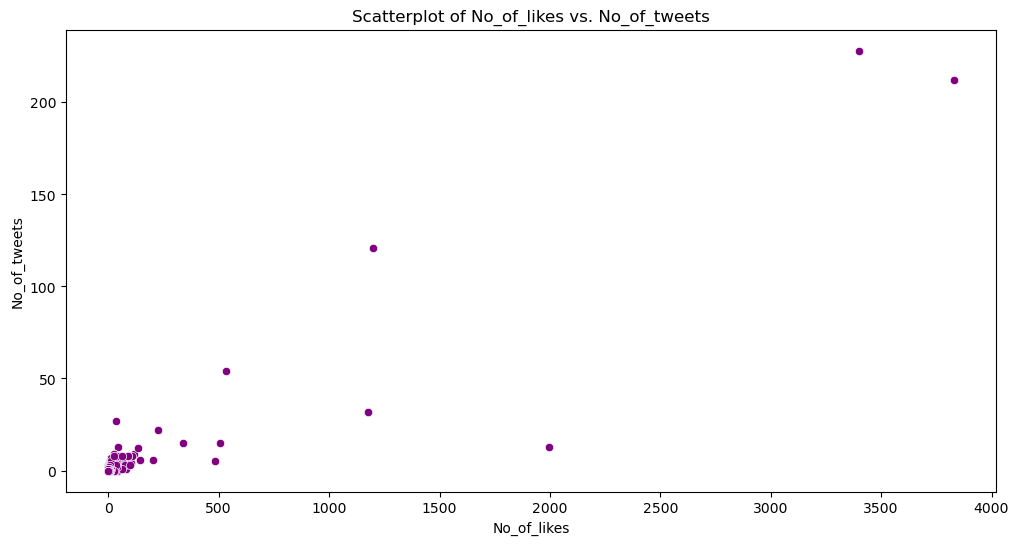

In [10]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='No_of_likes', y='No_of_tweets', data=df, color='purple')
plt.title('Scatterplot of No_of_likes vs. No_of_tweets')
plt.xlabel('No_of_likes')
plt.ylabel('No_of_tweets')
plt.show()


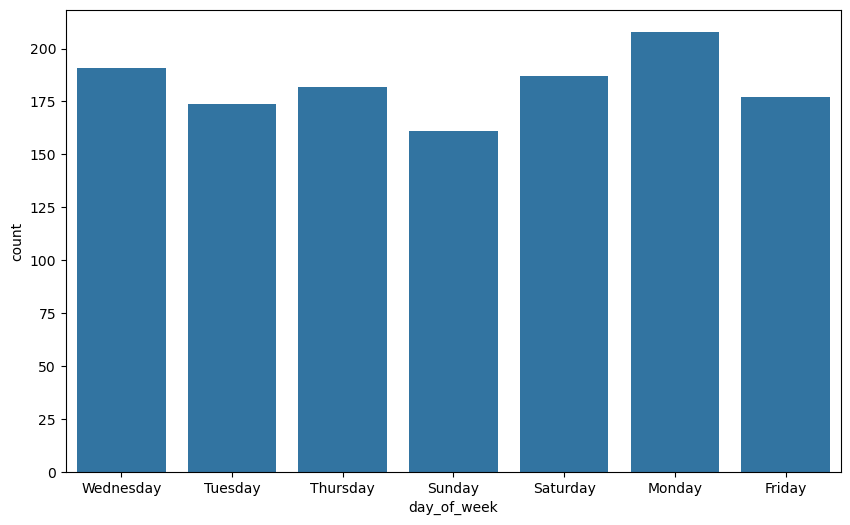

In [11]:
#Plot tweet distribution per day.
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=df)
plt.show()


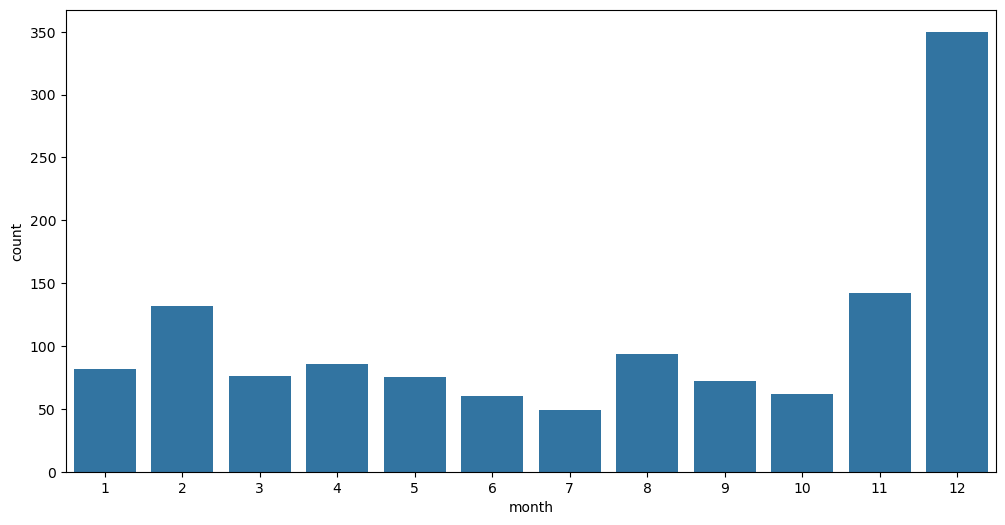

In [12]:
#Tweet distribution per month.  
plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=df)
plt.show()


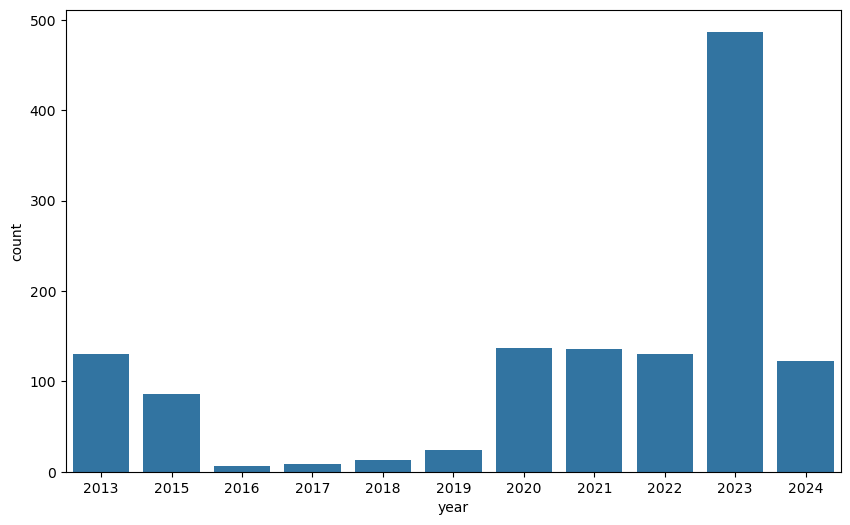

In [13]:
#Tweet distribution per year. 
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df)
plt.show()


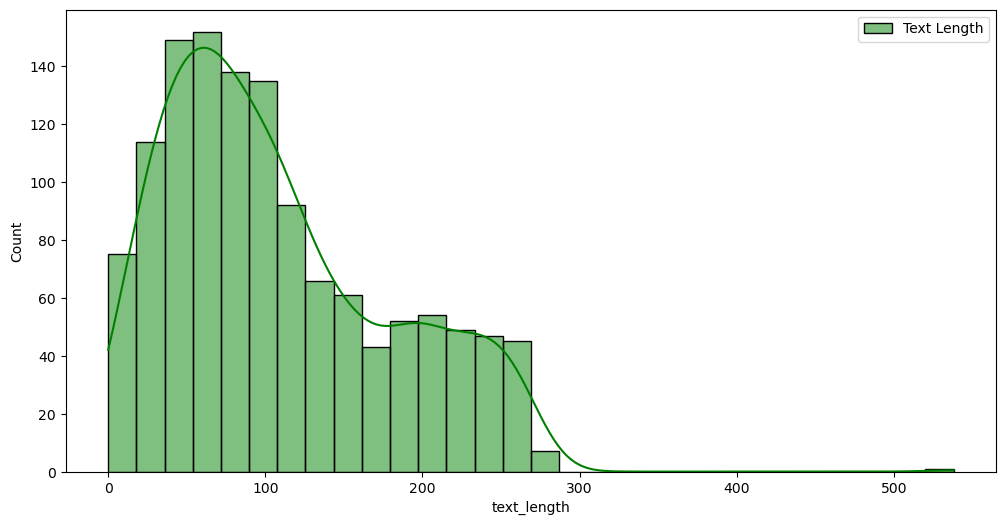

In [14]:
#Tweet length distribution. 
plt.figure(figsize=(12, 6))
sns.histplot(df['text_length'], bins=30, kde=True, color='green', label='Text Length')
plt.legend()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_16392\859609756.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


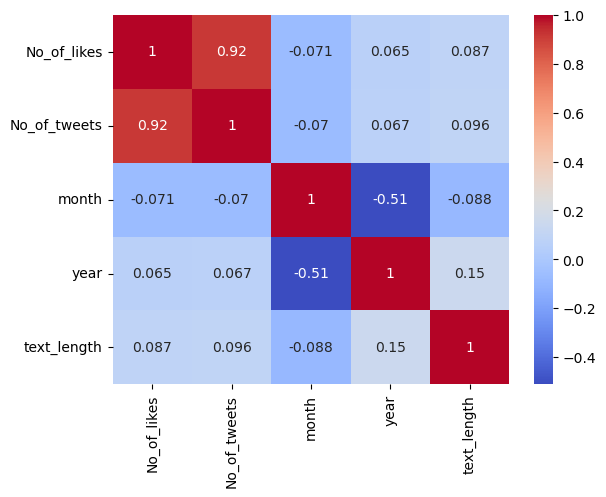

In [15]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [17]:
#!pip install wordcloud
# Run this command to install wordcloud. 


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 435.7 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/300.2 kB 435.7 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/300.2 kB 178.6 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/300.2 kB 252.2 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 327.7 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 327.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 285.2 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/300.2 kB 327.9 kB/s eta 0:00:01
   --

### <b><span style='color:#16C2D5'>|</span> Visualize with word cloud</b> 

This is necessary to get a visual of the most commonly said words from EABL twitter sentiments. 

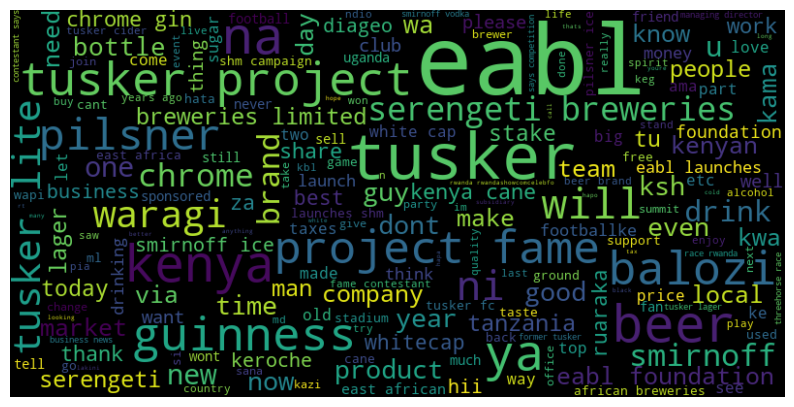

In [18]:
from wordcloud import WordCloud

text_combined = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100).generate(text_combined)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [24]:
# Check column names for df
print(df.columns)


Index(['text', 'No_of_likes', 'No_of_tweets', 'day_of_week', 'month', 'year',
       'text_length'],
      dtype='object')


Top 10 Most Frequent Words:
eabl: 608
tusker: 386
kenya: 128
project: 105
beer: 103
guinness: 101
pilsner: 99
balozi: 91
breweries: 88
smirnoff: 85


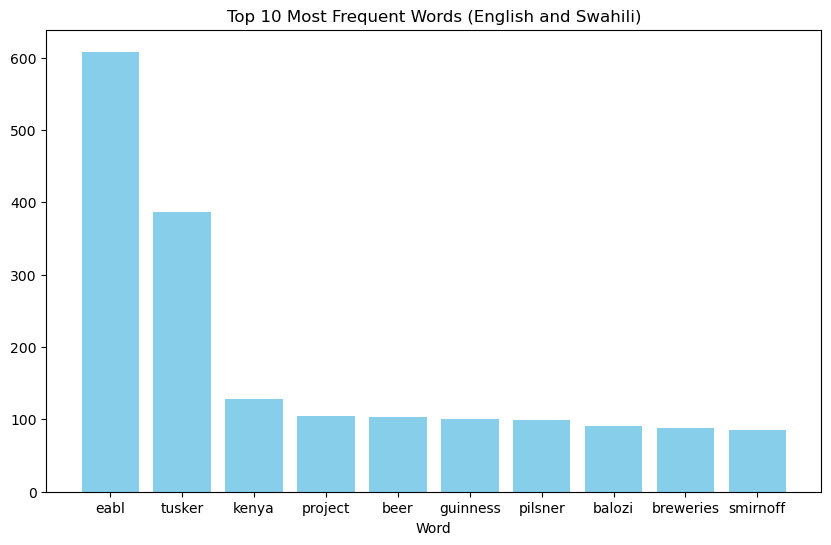

In [40]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Predefined set of Swahili stop words
swahili_stop_words = set([
    "na", "ya", "kwa", "ni", "za", "la", "katika", "kwa", "hii", "hivyo",
    "bila", "mimi", "sisi", "wao", "yeye", "huyo", "wetu", "wenu", "wao",
    "yangu", "yetu", "yako", "yao", "wangu", "wetu", "wako", "wao", "kangu",
    "kenu", "kao", "kao", "wangu", "wetu", "wako", "wao", "kangu", "kenu",
    "kao", "kao", "kangu", "kenu", "kao", "kao", "zangu", "zetu", "zako",
    "zao", "vangu", "vetu", "vako", "vao", "vyangu", "vyetu", "vyako", "vyao"
])

# Combine English and Swahili stop words
stop_words_english = set(stopwords.words('english'))
combined_stop_words = stop_words_english.union(swahili_stop_words)

# Function to clean and remove stop words from text
def clean_text_with_swahili(text):
    words = text.split()
    cleaned_words = [word.lower() for word in words if word.lower() not in combined_stop_words]
    return ' '.join(cleaned_words)

# Apply the clean_text_with_swahili function to your 'text' column
df['cleaned_text_swahili'] = df['text'].apply(clean_text_with_swahili)

# Get the top 10 most frequent words
words_combined = ' '.join(df['cleaned_text_swahili']).split()
word_freq_combined = Counter(words_combined)
top_words_combined = word_freq_combined.most_common(10)

# Display the top 10 words
print("Top 10 Most Frequent Words:")
for word, frequency in top_words_combined:
    print(f"{word}: {frequency}")

# Plot the top 10 most frequent words
plt.figure(figsize=(10, 6))
plt.bar(*zip(*top_words_combined), color='skyblue')
plt.title('Top 10 Most Frequent Words (English and Swahili)')
plt.xlabel('Word')
plt.show()


The provided Python code performs Natural Language Processing (NLP) exploratory data analysis (EDA) on a text dataset in Swahili. Here's a summary of the code:

1. **Stopwords Definition:**
   - A predefined set of Swahili stopwords is created, including common words like "na," "ya," "kwa," etc.
   - English stopwords are imported from the `stopwords` module.

2. **Text Cleaning Function:**
   - The `clean_text_with_swahili` function is defined to clean the text by removing stopwords and converting words to lowercase.
   - The function is applied to the 'text' column of the DataFrame (`df`).

3. **Top 10 Most Frequent Words Analysis:**
   - The cleaned text is split into words, and a Counter is used to count the frequency of each word.
   - The top 10 most frequent words are determined.

4. **Visualization:**
   - A bar plot is created to visualize the frequency of the top 10 words in the cleaned text.

This analysis helps identify the most common words in the Swahili text dataset after removing stopwords, providing insights into the dataset's linguistic patterns. The resulting bar plot visually represents the frequency of each word, aiding in understanding the prominent terms in the dataset.
 
 From the analysys, the top 10 words are, eabl: 608
tusker: 386
kenya: 128
project: 105
beer: 103
guinness: 101
pilsner: 99
balozi: 91
breweries: 88
smirnoff: 85

In [42]:
!pip install textblob


     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     - ----------------------------------- 30.7/636.8 kB 660.6 kB/s eta 0:00:01
     - ----------------------------------- 30.7/636.8 kB 660.6 kB/s eta 0:00:01
     - ----------------------------------- 30.7/636.8 kB 660.6 kB/s eta 0:00:01
     - ----------------------------------- 30.7/636.8 kB 660.6 kB/s eta 0:00:01
     ---- -------------------------------- 71.7/636.8 kB 262.6 kB/s eta 0:00:03
     ----- ------------------------------- 92.2/636.8 kB 327.7 kB/s eta 0:00:02
     ----- ------------------------------- 92.2/636.8 kB 327.7 kB/s eta 0:00:02
     ------ ----------------------------- 112.6/636.8 kB 273.1 kB/s eta 0:00:02
     ------ ----------------------------- 122.9/636.8 kB 277.4 kB/s eta 0:00:02
     -------- --------------------------- 153.6/636.8 kB 316.5 kB/s eta 0:00:02
     -------- --------------------------- 153.6/636.8 kB 316.5 kB/s eta 0:00:02
     --------- -------------------------- 174.1

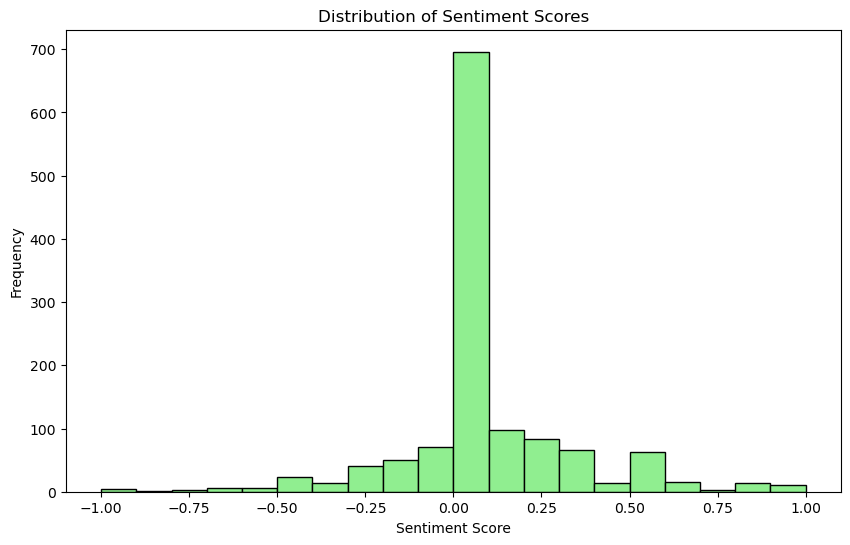

In [43]:
from textblob import TextBlob

df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(10, 6))
plt.hist(df['sentiment'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [47]:
descriptive_stats = df.describe()
print(descriptive_stats)


       No_of_likes  No_of_tweets        month         year  text_length  \
count  1280.000000   1280.000000  1280.000000  1280.000000  1280.000000   
mean     15.145312      1.103906     7.639062  2020.711719   107.966406   
std     166.116534      9.644388     3.958468     3.438573    71.975419   
min       0.000000      0.000000     1.000000  2013.000000     0.000000   
25%       0.000000      0.000000     4.000000  2020.000000    51.750000   
50%       0.000000      0.000000     8.000000  2022.000000    92.000000   
75%       2.000000      1.000000    12.000000  2023.000000   154.000000   
max    3829.000000    228.000000    12.000000  2024.000000   538.000000   

         sentiment  
count  1280.000000  
mean      0.068438  
std       0.253063  
min      -1.000000  
25%       0.000000  
50%       0.000000  
75%       0.166667  
max       1.000000  


In [48]:
day_of_week_distribution = df['day_of_week'].value_counts()
month_distribution = df['month'].value_counts()
print(day_of_week_distribution)
print(month_distribution)


Monday       208
Wednesday    191
Saturday     187
Thursday     182
Friday       177
Tuesday      174
Sunday       161
Name: day_of_week, dtype: int64
12    350
11    142
2     132
8      94
4      86
1      82
3      76
5      75
9      72
10     62
6      60
7      49
Name: month, dtype: int64


In [49]:
grouped_stats = df.groupby('day_of_week')['No_of_likes'].mean()
print(grouped_stats)


day_of_week
Friday       26.943503
Monday        7.033654
Saturday      4.716578
Sunday       32.260870
Thursday     22.818681
Tuesday      13.183908
Wednesday     3.303665
Name: No_of_likes, dtype: float64


In [51]:
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
df.set_index('date', inplace=True)


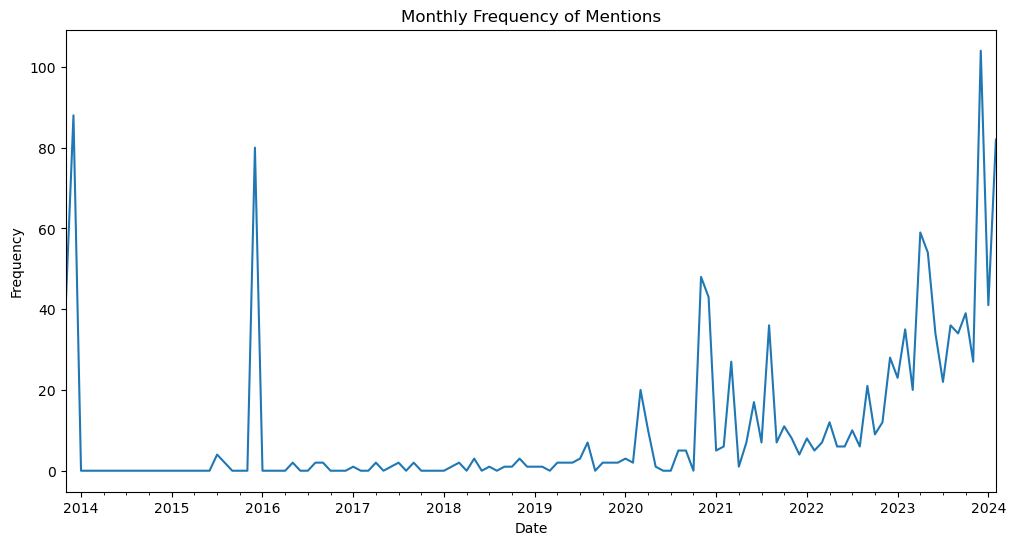

In [53]:
#Explore Monthly Trends
plt.figure(figsize=(12, 6))
df.resample('M').size().plot(legend=False)
plt.title('Monthly Frequency of Mentions')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()


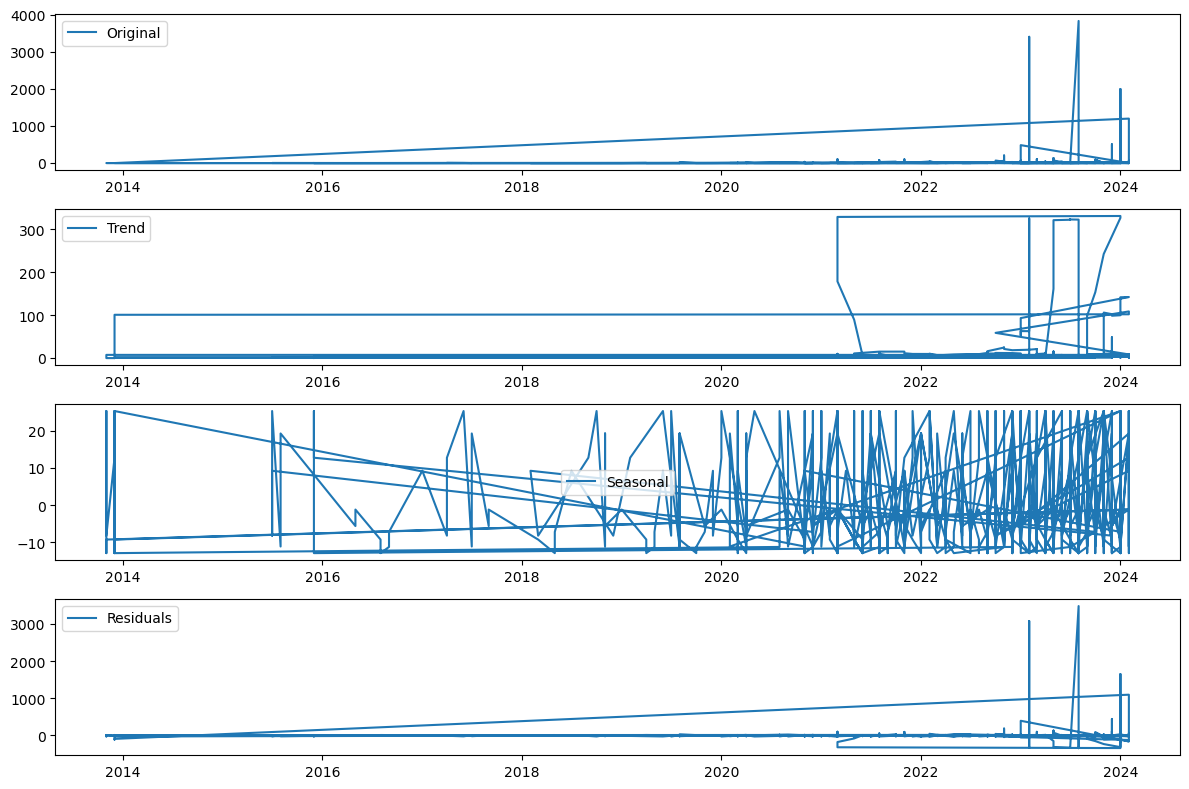

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['No_of_likes'], period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['No_of_likes'], label='Original')
plt.legend()
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend()
plt.tight_layout()
plt.show()


In [60]:
# Display column names and structure of the DataFrame
print(df.columns)
print(df.head())


Index(['text', 'No_of_likes', 'No_of_tweets', 'day_of_week', 'month', 'year',
       'text_length', 'product', 'cleaned_text', 'cleaned_text_swahili',
       'sentiment'],
      dtype='object')
                                                         text  No_of_likes  \
date                                                                         
2024-01-01  unajua sai amafanya eabl anaweza tupea a years...            0   
2023-12-01  my apologies balozi lager i wasnt familiar wit...            0   
2023-12-01  balozi is low grade packaged white cap a premi...           27   
2023-11-01  wind down on the th hole with ed parseens band...            0   
2023-09-01  naona mumetengenezea wanywezi wa balozi sacco ...            0   

            No_of_tweets day_of_week  month  year  text_length product  \
date                                                                     
2024-01-01             1   Wednesday      1  2024          120   Other   
2023-12-01             0     Tuesday 

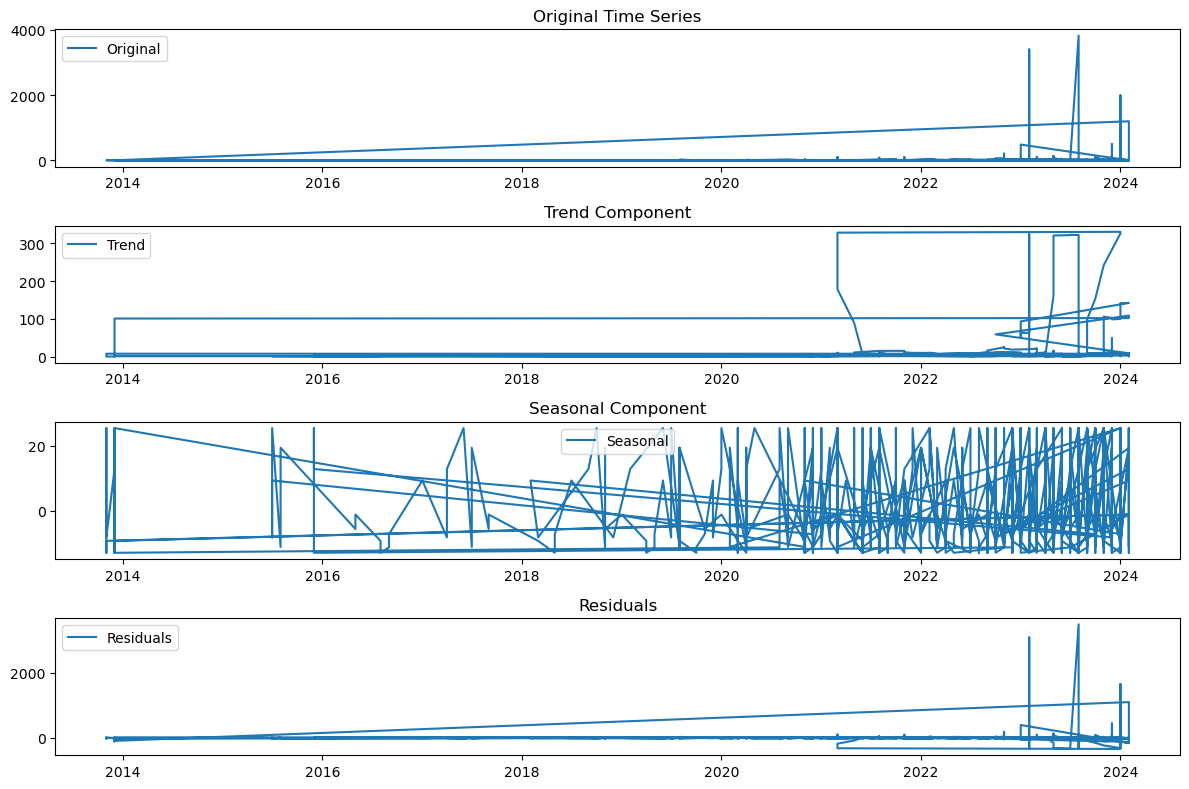

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition with an additive model
result = seasonal_decompose(df['No_of_likes'], model='additive', period=12)

# Plot the decomposition
plt.figure(figsize=(12, 8))

# Original time series
plt.subplot(4, 1, 1)
plt.plot(df['No_of_likes'], label='Original')
plt.legend()
plt.title('Original Time Series')

# Trend component
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()
plt.title('Trend Component')

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()
plt.title('Seasonal Component')

# Residuals
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals')
plt.legend()
plt.title('Residuals')

plt.tight_layout()
plt.show()


In [64]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify the polarity of the tweet
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the function to the 'text' column and create a new column 'sentiment'
df['sentiment'] = df['text'].apply(get_sentiment)

# Display the dataframe with the new 'sentiment' column
print(df[['text', 'sentiment']])


                                                         text sentiment
date                                                                   
2024-01-01  unajua sai amafanya eabl anaweza tupea a years...   Neutral
2023-12-01  my apologies balozi lager i wasnt familiar wit...  Negative
2023-12-01  balozi is low grade packaged white cap a premi...   Neutral
2023-11-01  wind down on the th hole with ed parseens band...  Positive
2023-09-01  naona mumetengenezea wanywezi wa balozi sacco ...  Positive
...                                                       ...       ...
2024-02-01  yep so it hasnt outlawed christianity you said...  Positive
2024-02-01                                             waragi   Neutral
2024-02-01  hes a prick because he doesnt want to deport a...   Neutral
2024-02-01  hhahahaha brexit is a shitshow why have they d...  Positive
2024-02-01  would you call zuby whose channel you went on ...   Neutral

[1280 rows x 2 columns]


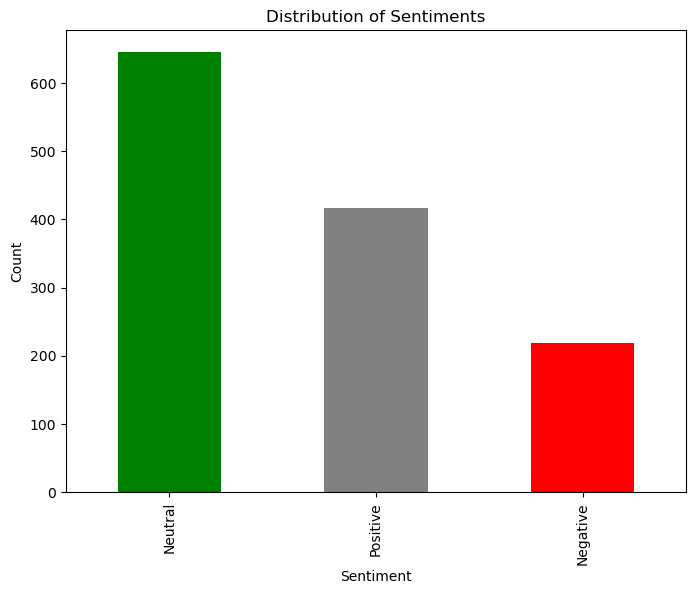

In [67]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Sentiment analysis generally helps in gaining a deeper understanding of public opinion, customer sentiment, and market trends. By leveraging text data and advanced analytics techniques, businesses can gain actionable insights to improve products, services, and decision-making processes.